# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [40%]

Spring 2021 semester.

Due date: **July 19th 2021.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file (exact submission guidelines will be given in the next couple of days). 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display one train and one test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.


## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class] and train the model for 10 epochs.

**b)**   Now set the learning rate to 10 and retrain. Give a brief explanation to the observed results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on the CIFAR-10 training set and Visualize the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

**b)**  Give a breakdown of the number of parameters within the above model, as well as the overall number.

# ***Example Code***

In [1]:
# imports
from __future__ import print_function
import argparse
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torchvision
from torch import classes
from torchvision import datasets, transforms

from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np

import cv2

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
    num_inputs = 784

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    num_inputs = 3072


train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
# train and test functions
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [6]:
# Training
# for i in range(1, epochs+1):
#   train(i)

In [7]:
# Testing
# test()

# **Answer (1):**
create needed blocks of code (and results) below




**a)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


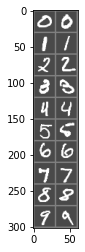


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


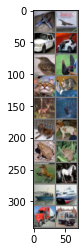

In [8]:
def loadData(dataset, shuffle=True):
    if dataset == 'mnist':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        trainset = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
        testset = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
        classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
        num_inputs = 784
    elif dataset == 'cifar10':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
        trainset = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
        testset = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
        classes = ('plane', 'car', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        num_inputs = 3072

    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=shuffle, num_workers=0)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

    return train_loader, test_loader, classes, num_inputs


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def getimg(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    return (np.transpose(npimg, (1, 2, 0)))

minstClass = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
cifarClass = ('plane', 'car', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataclasses = {'mnist': minstClass, 'cifar10': cifarClass}

images = []

#train_loader, test_loader, classes = loadData(data)
datas = ['mnist', 'cifar10']
for data in datas:
  train_loader, test_loader, classes, num_inputs = loadData(data)

  trainiter = iter(train_loader)
  trainimages, trainlabels = trainiter.next()

  testiter = iter(test_loader)
  testimages, testlabels = testiter.next()
  plt.cla()
  images = []
  for c in dataclasses[data]:
      classes = dataclasses[data]
      for id, img in enumerate(trainimages):
          if classes[trainlabels[id]] == c:
              images.append(img)
              break
      for id, img in enumerate(testimages):
          if classes[testlabels[id]] == c:
              images.append(img)
              break

  imshow(torchvision.utils.make_grid(images, nrow=2))



# **Answer (2):**


**a)**

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.455497
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.239564
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.053904
Train Epoch: 4 [0/60000 (0%)]	Loss: 1.893219
Train Epoch: 5 [0/60000 (0%)]	Loss: 1.752875
Train Epoch: 6 [0/60000 (0%)]	Loss: 1.628941
Train Epoch: 7 [0/60000 (0%)]	Loss: 1.518420
Train Epoch: 8 [0/60000 (0%)]	Loss: 1.419143
Train Epoch: 9 [0/60000 (0%)]	Loss: 1.329497
Train Epoch: 10 [0/60000 (0%)]	Loss: 1.248223


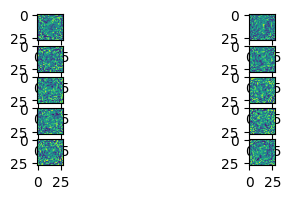

In [9]:
def train(epoch, train_loader, optimizer, network):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
        break

def test(test_loader, network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()  # sum up batch loss
        # test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, layers):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.layers = layers

    def forward(self, input):
        input = input.view(-1, self.num_inputs)  # reshape input to batch x num_inputs
        return self.layers(input)


data = "mnist"
batch_size = 50
train_loader, test_loader, classes, num_inputs = loadData(data, False)

layers = nn.Sequential(
    nn.Linear(num_inputs, num_outputs)
)

network = Net(num_inputs, num_outputs, layers)
optimizer = optim.SGD(network.parameters(), lr=lr)

# Training
for i in range(1, epochs + 1):
    train(i, train_loader, optimizer, network)

def displayWeights(network):
    for param in network.parameters():
        d = param.data.detach().cpu().numpy()
        return d

# Print the weights of each output after the last epoch.
fig = plt.figure(figsize=(5, 2), dpi=100)
weights = displayWeights(network)
for idx, img in enumerate(weights):
    fig.add_subplot(5, 2, (idx+1))
    plt.imshow(np.reshape(img, (28,28)))
plt.show()



**b)** The result of limiting the number of examples to 50 the network will give small loss in the training section (because it will train on a very specific dataset), but when testing it on a real data, the result will be poor.

# **Answer (3):**
create needed blocks of code (and results) below

**a)**

In [10]:
def train(epoch, train_loader, optimizer, network):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

batch_size = 64
lr = 0.01
print("Learning Rate: ", lr)
data = "mnist"


train_loader, test_loader, classes, num_inputs = loadData(data)
layers = nn.Sequential(
          nn.Linear(num_inputs, 1000),
          nn.Tanh(),
          nn.Linear(1000, num_outputs)
     )


network = Net(num_inputs, num_outputs, layers)
optimizer = optim.SGD(network.parameters(), lr=lr)

# Training
for i in range(1, epochs + 1):
    train(i, train_loader, optimizer, network)


lr = 10

print("Learning Rate: ", lr)
# Training
for i in range(1, epochs + 1):
    train(i, train_loader, optimizer, network)


Learning Rate:  0.01
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.349562
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.774654
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.575926
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.367759
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.315608
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.252229
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.282357
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.422812
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.310872
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.384680
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.486581
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.317732
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.406053
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.362434
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.454347
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.406068
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.420542
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.298357
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.418264
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

**b)**  Because the network has already learned, increasing the learning rate will cause the network to repeatedly miss new information from the images so that at best it will revolve around the same loss and at worst case even increase it significantly.

# **Answer (4):**
create needed blocks of code (and results) below

**a)**

Files already downloaded and verified
Files already downloaded and verified


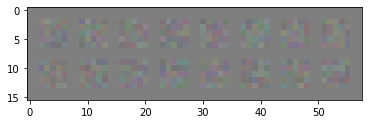

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.283492
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.680318
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.476834
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.596486
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.638269
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.344022
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.716790
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.203530
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.699515
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.205850
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.134477
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.185391
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.277264
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.271756
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.188631
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.132245
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.080816
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.192045
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.983079
Train Epoch: 3 [19200/50000 (38%)]	Loss: 0.965840
Train Epoch: 3 [25

In [11]:

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.l1 = nn.Conv2d(3, 16, kernel_size=5)
        self.l2 = nn.Tanh()
        self.l3 = nn.MaxPool2d(2)
        self.l4 = nn.Conv2d(16,128,kernel_size=5)
        self.l5 = nn.Tanh()
        self.l6 = nn.MaxPool2d(2)
        self.l7 = nn.Linear(5*5*128,64)
        self.l8 = nn.Tanh()
        self.l9 = nn.Linear(64, num_outputs)

    def forward(self, input):
        #input = input.view(-1, self.num_inputs)  # reshape input to batch x num_inputs
        input = self.l1(input)
        input = self.l2(input)
        input = self.l3(input)
        input = self.l4(input)
        input = self.l5(input)
        input = self.l6(input)
        input = torch.flatten(input, 1)
        input = self.l7(input)
        input = self.l8(input)
        input = self.l9(input)
        return input
lr = 0.1
data = "cifar10"

train_loader, test_loader, classes, num_inputs = loadData(data)
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
def visualizeLayer(conv1):
  weight = conv1.weight.data
  imshow(torchvision.utils.make_grid(weight))
  
visualizeLayer(network.l1)
# Training
for i in range(1, epochs + 11):
    train(i, train_loader, optimizer, network)


**b)**
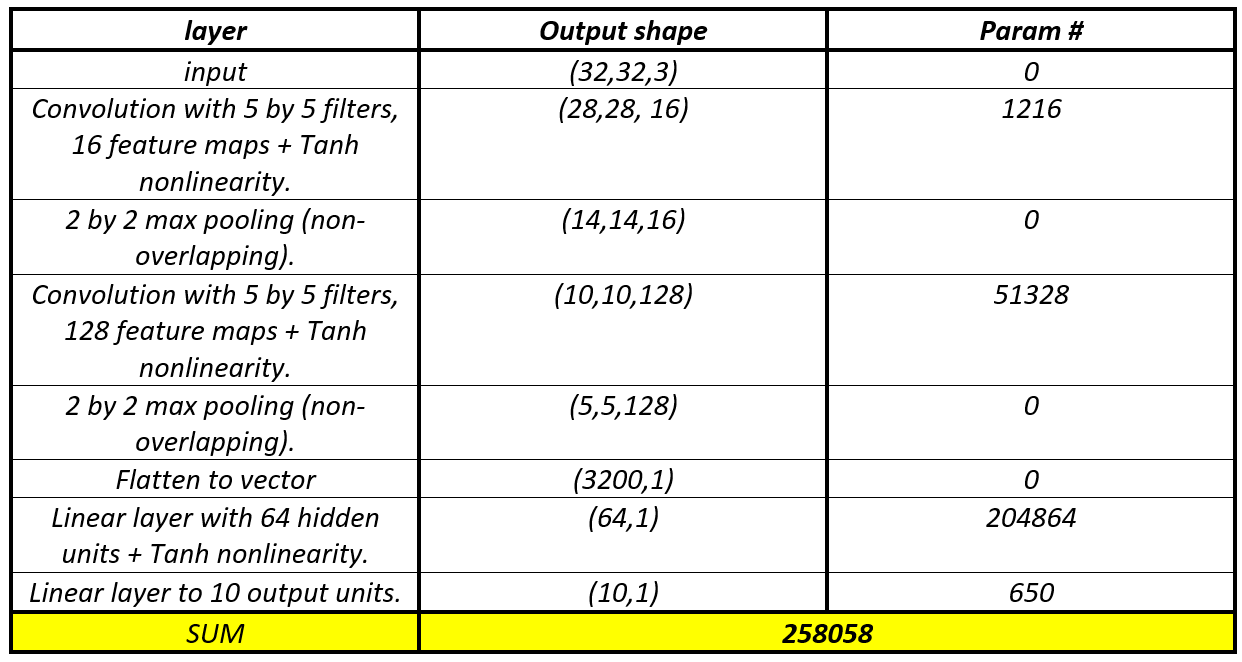

Thanks to the help from the article: [Understanding and Calculating the number of Parameters in Convolution Neural Networks (CNNs)](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d) 